# LEPL1106, Devoir 3 : représentation d'état

## 0) Introduction et objectif


*Vous venez d'acheter une maison à rénover à côté d'un héliport. Pour limiter les nuisances sonores liées au décollage et à l'atterrissage des hélicoptères, vous cherchez à mieux isoler acoustiquement la maison. Pour répondre à ce problème, vous allez évaluer la transmission des bruits de moteurs dans la maison à partir d'un système modélisant cette transmission.*

Ce devoir comporte donc deux parties. Dans un premier temps, vous allez créer une fonction qui calcule la représentation matricielle du système. Ensuite, vous calculerez, sur base de la représentation matricielle, la réponse (la sortie) du système pour une entrée donnée. Sur INGInious, en fin de devoir, vous aurez un petit QCM pour exercer votre compréhension des systèmes et des réponses impulsionnelles.

Dans ce Notebook, vous aurez l'occasion de tester vos fonctions de traitement de signal sur des signaux audio réels.

Pour créer, stocker, et opérer sur les signaux, on utilisera le package [`NumPy`](http://www.numpy.org/) de Python. Pour manipuler les systèmes, on utilisera le package [`scipy.signal`](https://docs.scipy.org/doc/scipy/reference/signal.html).

In [265]:
import numpy as np
import scipy.signal as sg

import matplotlib.pyplot as plt

## 1) Représentation matricielle


Vous avez réussi à modéliser la manière dont le bruit se transmet dans la maison en fonction de paramètres liés aux matériaux de construction (isolants ou non) utilisés. Ainsi, si $x[n]$ représente le bruit d'un moteur et $y[n]$ l'expression du bruit dans la maison, on a

$$ y[n] = \alpha x[n] - \beta y[n-1].$$

Remarquez que nous travaillons ici sur une version discrétisée du problème, ce qui est assez courant en pratique. Afin de calculer la réponse d'un tel système, nous allons commencer par calculer sa représentation d'état sous forme matricielle. Ainsi, on vous demande d'implémenter la fonction ``(A,B,C,D) = computeMatrices(alpha,beta)`` qui prend en entrée les variables $\alpha$ et $\beta$  et retourne les matrices de la représentation d'état. Les matrices ont la définition usuelle suivante :
$$
    \begin{align}
        q[n+1]&=Aq[n]+Bx[n],\\
          y[n]&=Cq[n]+Dx[n]
    \end{align}
$$
et ont donc les dimensions adéquates. Les matrices en sortie doivent être retournées sous forme de numpy array.

In [266]:
## LE CONTENU DE CETTE CELLLULE EST A SOUMETTRE SUR INGINIOUS
def computeMatrices(alpha,beta):
    """
    Calcule les matrices de représentation d'état (`A`,`B`,`C`,`D`) pour un système tel que `y[n] = alpha*x[n] - beta*y[n-1]`   \n
    représentant le bruit à l'intérieur d'une pièce face à un bruit extérieur

    Arguments
    ---------
    `alpha` : int, float
        taux de transmission du bruit extérieur

    `beta` : int, float
        taux de conservation du bruit intérieur
    
    Retourne
    --------
    `A` : ndarray(2D)
        matrice d'état

    `B` : ndarray(2D)
        matrice de commande

    `C` : ndarray(2D)
        matrice d'observation

    `D` : ndarray(2D)
        matrice d'action directe
    """
    
    A = np.array([[-beta]])
    B = np.array([[alpha]])
    C = np.array([[-beta]])
    D = np.array([[alpha]])
    
    return (A,B,C,D)

In [267]:
## CELLULE DE TEST

alpha = 0.8
beta = 0.8

A,B,C,D = computeMatrices(alpha,beta)

print("A = ")
print(A)
print("B = ")
print(B)
print("C = ")
print(C)
print("D = ")
print(D)

A = 
[[-0.8]]
B = 
[[0.8]]
C = 
[[-0.8]]
D = 
[[0.8]]


## 2) Sortie du système

En partant du template fourni ci-dessous, complétez la fonction  `(ty,y) = systemeDiscret(A,B,C,D,ts,x=None)` qui calcule la réponse d'un système discret à un signal d'entrée donné.
Votre fonction prendra comme arguments:

- Les matrices (numpy array) ``A``, ``B``, ``C``, ``D`` qui correspondent au système et sont obtenues par exemple avec la fonction `computeMatrices`. Vous pouvez supposer que ces matrices ont les dimensions adéquates.

- ``ts``qui donne le temps d'échantillonnage $t_s>0$ (i.e., temps entre deux mesures consécutives) du système en secondes. Si le système est discret par nature, n'importe quelle valeur pour ``ts`` peut être utilisée, mais la plus naturelle est ``ts``=1.

- ``x`` qui est un signal d'entrée $x[n]$ discret sous forme vectorielle (numpy array). Ce signal commence en $t=0$ et a un temps d'échantillonage de $t_s$. Cette entrée est optionnelle.

Votre fonction doit fournir en sortie (sous forme de numpy array)

- `y`, la réponse du système $y$ pour l'entrée $x$ si celle-ci est fournie (autrement dit, si `x` est différent de `None`), **autrement `y` est la réponse impulsionnelle du système.**
- `ty` le vecteur temps associé au signal `y`, qui doit être cohérent avec la valeur ``ts``. 

On vous demande que chaque sortie soit un vecteur, ce qui signifie par exemple que la commande `ty.shape` doit vous retourner quelque chose de la forme `(100,)` (et non pas `(100,1)`).  Pour passer d'une représentation à l'autre vous pouvez utiliser la fonction `reshape` de numpy, ou la fonction `squeeze`.


Fonctions à utiliser: `StateSpace`, `dimpulse`, `dlsim` (*note: si vous ne savez pas ce que font ces fonctions, allez lire leur documentation ou utilisez ``help(sg.nomDeLaFonction)``)*.

In [268]:
## LE CONTENU DE CETTE CELLLULE EST A SOUMETTRE SUR INGINIOUS
def systemeDiscret(A, B, C, D, ts, x=None):
    """
    Calcule la sortie d'un système LIT discret en fonction de ses matrices de représentation d'état (`A`,`B`,`C`,`D`) et son signal d'entrée `x`

    Arguments
    ---------
    `A` : ndarray(2D)
        matrice d'état

    `B` : ndarray(2D)
        matrice de commande

    `C` : ndarray(2D)
        matrice d'observation

    `D` : ndarray(2D)
        matrice d'action directe

    `ts` : int
        temps d'échantillonnage du système

    `x` : ndarray(0D,1D), optional
        signal d'entrée du système
    
    Retourne
    --------
    `ty` : ndarray(0D)
        temps auquels la sortie du système est calculée

    `y`  : ndarray(0D)
        sortie du système correspondants aux temps de `ty`
    
    Notes
    -----
    La fonction retourne la réponse impulsionnelle du système si `x` n'est pas précisé
    """

    # Création d'une représentation d'état via scipy.signal
    sg_system = sg.StateSpace(A, B, C, D, dt=ts)

    # On récupère la réponse du système au signal d'entrée, ou bien la réponse impulsionnelle si x n'est pas précisé
    if x is None:
        ty, y = sg.dimpulse(sg_system)
    else:
        ty, y, _ = sg.dlsim(sg_system,x,t=[k*ts for k in range(len(x))])

    # On retourne la réponse en transformant ty et y en vecteurs (0D)
    return (np.squeeze(ty), np.squeeze(y))


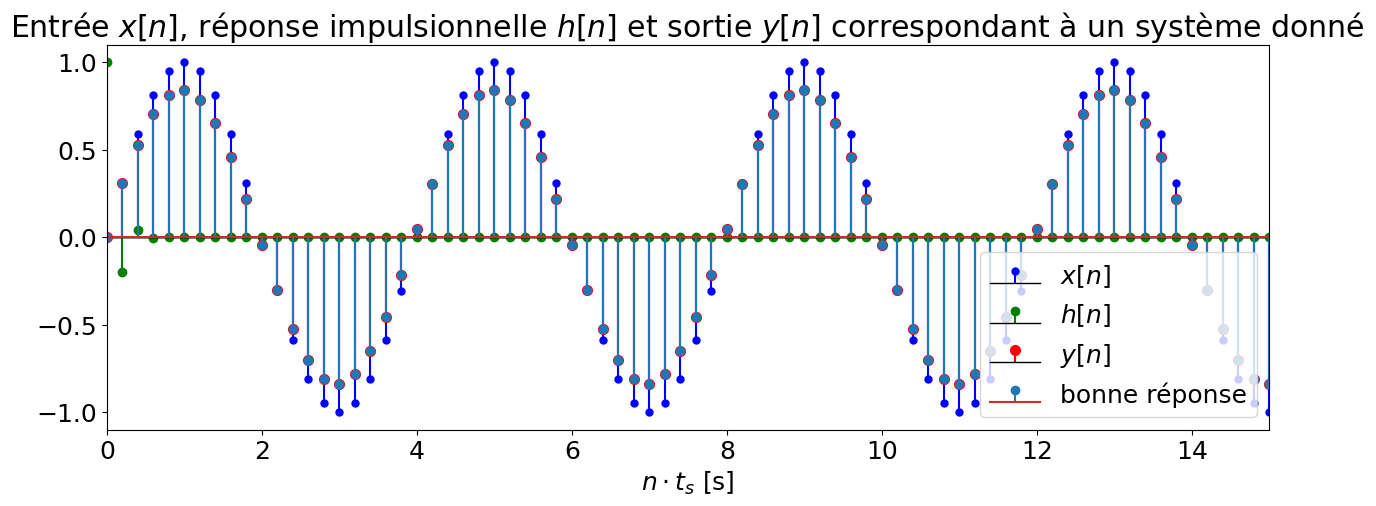

In [269]:
## CELLULE DE TEST

# Permet de créer le signal de sortie sans passer par la représentation d'état
def calculateTrueAnswer(x,alpha,beta):
    output = []
    current_y = 0
    for i in range(len(x)):
        current_y = alpha*x[i]-beta*current_y
        output.append(current_y)
    return np.array(output)

# Créer un signal sinusoidal discret
ts = 0.2
tx = np.arange(0, 20+ts, ts)
x = np.sin(0.5*np.pi*tx)

# Définir les paramètres du système
alpha = 1
beta = 0.2

# Calculer la représentation d'état
A,B,C,D = computeMatrices(alpha,beta)

# Matrices à utiliser par défaut si votre fonction computeMatrices ne fonctionne pas
# A = np.array([0.2])
# B = np.array([0.2])
# C = np.array([2.0])
# D = np.array([-1.1])

# Obtenir la reponse impulsionelle
th, h = systemeDiscret(A, B, C, D, ts)

# Obtenir la reponse à l'entrée x[n]
ty, y = systemeDiscret(A, B, C, D, ts, x)

# Affichage
plt.figure(figsize=(15,5))
plt.rcParams.update({"font.size" : 18})

mk_x, st_x, bl_x = plt.stem(tx, x, label="$x[n]$")
mk_h, st_h, bl_h = plt.stem(th, h, label="$h[n]$")
mk_y, st_y, bl_y = plt.stem(ty, y, label="$y[n]$")
plt.stem(tx, calculateTrueAnswer(x,alpha,beta), label="bonne réponse")

mks = (mk_x, mk_h, mk_y)
sts = (st_x, st_h, st_y)
bls = (bl_x, bl_h, bl_y)

colors = ("b", "g", "r")
sizes = (5, 6, 7)

# Donner du style aux signals de façon compacte 
for mk, st, bl, c, s in zip(mks, sts, bls, colors, sizes):
    bl.set_color('k') 
    bl.set_linewidth(1)
    mk.set_markersize(s)
    mk.set_color(c) 
    st.set_color(c)

    
plt.xlim([0.0, 15.0])

plt.title("Entrée $x[n]$, réponse impulsionnelle $h[n]$ et sortie $y[n]$ correspondant à un système donné ")
plt.xlabel('$n\cdot t_s$ [s]')

plt.legend()
plt.show()

## Tests audio

Les réponses impulsionnelles présentées sur INGInious pour le QCM sont les réponses impulsionnelles du système avec $\alpha, \beta = (0.1,-1.00005); (2,-0.8); (0.1, 0.995)$, dans cet ordre.

Vous pouvez donc vérifier à l'aide du code ci-dessous si votre implémentation des deux fonctions précédentes est correcte, et écouter l'effet du choix des matériaux isolants (le système) sur les bruits de moteurs (enregistré dans ``bruit_moteur.wav`` fourni sur Moodle).

Quelle combinaison de $\alpha$ et $\beta$ est la plus performante dans le but d'atténuer le bruit de moteur ?


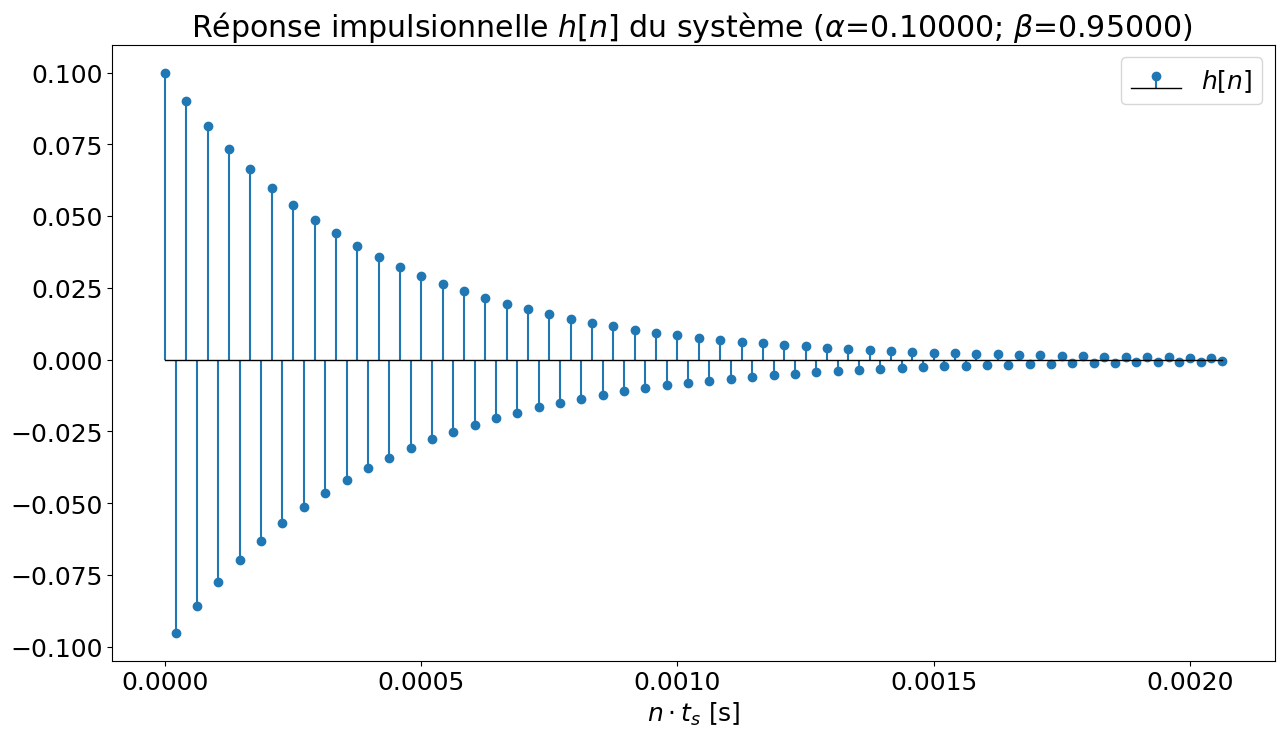

In [270]:
from scipy.io.wavfile import read, write

fs, x = read("data/bruit_moteur.wav")
typeL = type(x[0]) #Le type utilisé par votre ordinateur pour les fichiers sons
ts = 1/fs

#modifier pour voir les autres cas
alpha =  0.1
beta =  0.95

A1,B1,C1,D1 = computeMatrices(alpha,beta)

# Affichage
plt.figure(figsize=(15,8))
plt.rcParams.update({"font.size" : 18})

[th1, h1] = systemeDiscret(A1, B1, C1, D1, ts)
_,_, bl = plt.stem(th1, h1, label="$h[n]$")
bl.set_color('k') 
bl.set_linewidth(1)

plt.title(r"Réponse impulsionnelle $h[n]$ du système ($\alpha$={:.5f}; $\beta$={:.5f}) ".format(alpha,beta))
plt.xlabel('$n\cdot t_s$ [s]')

plt.legend()
plt.savefig(str(alpha)+"_"+str(beta)+".png") 
plt.show()

[ty1, y1] = systemeDiscret(A1, B1, C1, D1, ts, x)


# Ce cast de y1 est nécessaire pour que le fichier soit lu, 
# mais tronque certaines données
y1 = y1.astype(typeL) 
write("sortie.wav", fs, y1)

Vous pouvez aller lire les fichiers `sortie.wav` ainsi obtenus à l'aide de votre lecteur préféré.